In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

In [2]:
resnet_model = ResNet50(weights='imagenet' , include_top = False , input_shape=(224,224,3))

2024-05-25 09:26:03.009519: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-05-25 09:26:03.009651: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-25 09:26:03.009679: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-25 09:26:03.010337: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-25 09:26:03.010749: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


94765736/94765736 [==============================] - 24s 0us/step


In [3]:
dataset_url = r'/Users/aditya/Desktop/General/Projects/2750'
batch_size = 32
img_height = 244
img_width = 244
validation_split=0.2
rescale=1.0/255

In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=validation_split, rescale=rescale)
dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset_url, image_size=(img_height, img_width), batch_size=batch_size)

Found 27000 files belonging to 10 classes.


In [5]:
train_dataset = datagen.flow_from_directory(batch_size=batch_size,
                                           directory=dataset_url,
                                           shuffle=True,
                                           target_size=(img_height, img_width),
                                           subset="training",
                                           class_mode='categorical')

Found 21600 images belonging to 10 classes.


In [6]:
test_dataset = datagen.flow_from_directory(batch_size=batch_size,
                                           directory=dataset_url,
                                           shuffle=True,
                                           target_size=(img_height, img_width),
                                           subset="validation",
                                           class_mode='categorical')

Found 5400 images belonging to 10 classes.


In [11]:
model = tf.keras.Sequential()
model.add(resnet_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(96, activation='relu'))
model.add(tf.keras.layers.Dropout(.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
for layer in resnet_model.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=5, batch_size=32)

Epoch 1/5
675/675 [==============================] - 1106s 2s/step - loss: 0.0862 - accuracy: 0.9731 - val_loss: 0.0802 - val_accuracy: 0.9702
Epoch 2/5
675/675 [==============================] - 1441s 2s/step - loss: 0.0864 - accuracy: 0.9706 - val_loss: 0.0786 - val_accuracy: 0.9726
Epoch 3/5
675/675 [==============================] - 1264s 2s/step - loss: 0.0725 - accuracy: 0.9768 - val_loss: 0.0609 - val_accuracy: 0.9772
Epoch 4/5
675/675 [==============================] - 1727s 3s/step - loss: 0.0579 - accuracy: 0.9806 - val_loss: 0.0712 - val_accuracy: 0.9763
Epoch 5/5
675/675 [==============================] - 967s 1s/step - loss: 0.0500 - accuracy: 0.9835 - val_loss: 0.0606 - val_accuracy: 0.9798


In [15]:
model.save('lulc_5_epoch')

INFO:tensorflow:Assets written to: lulc_5_epoch/assets


INFO:tensorflow:Assets written to: lulc_5_epoch/assets


In [18]:
import matplotlib.pyplot as plt

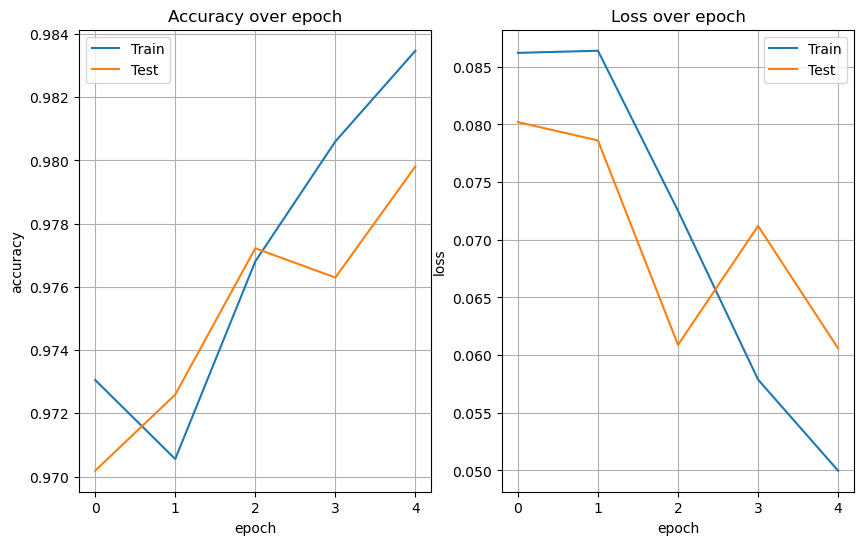

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.set_title('Accuracy over epoch')
ax1.legend(['Train', 'Test'], loc='upper left')
ax1.grid(True)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.set_title('Loss over epoch')
ax2.legend(['Train', 'Test'], loc="upper right")
ax2.grid(True)

In [24]:
preds = model.predict(test_dataset)

169/169 [==============================] - 62s 367ms/step


In [29]:
from sklearn.metrics import accuracy_score